# Assignment 2

## A short data story

In [6]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# load the file
data = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

month_mapping = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# add year column
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month.map(month_mapping)
data["Hour"] = data["Time"].astype(str).str[:2]

data = data[(data["Year"] != 2018)]

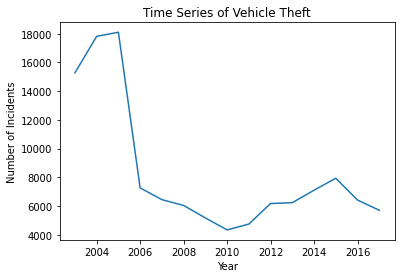

In [7]:
# plot a time series of the category 'VEHICLE THEFT' where x-axis is the year and y-axis is the number of incidents reported
data = data[data["Category"] == "VEHICLE THEFT"]
data = data.groupby(["Year"]).size().reset_index(name="Count")
plt.plot(data["Year"], data["Count"])
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Time Series of Vehicle Theft")
plt.show()

# Links to articles
[From Smash-and-Grabs to a Safer City: San Francisco’s Fight Against Car Burglaries (2023)](https://www.safewise.com/news/from-smash-and-grabs-to-a-safer-city-san-franciscos-fight-against-car-burglaries/)

# What to plot?
- Some sort of calender plot for the time series?
- A map of districts (maybe show the evolvement over the years (2005-2006) pr month)
- Bokeh plot (filter on Descript, districts)

## Bokeh plot

In [241]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.palettes import Category20, Blues256
from bokeh.io import output_file, show

# load the file
data = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

# add year column
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year

# filter out 2018
data = data[(data["Year"] != 2018)]

### Group by descript

In [274]:
# Create a groupby on the years, description and districts for the category 'VEHICLE THEFT'
df_vehicle = data[data["Category"] == "VEHICLE THEFT"]
descripts = sorted(df_vehicle["Descript"].unique())
df_vehicle = df_vehicle.groupby(["Year", "Descript"]).size()
df_vehicle = df_vehicle.unstack(level="Descript").reset_index()
df_vehicle = df_vehicle.fillna(0)

df_vehicle["Year"] = df_vehicle["Year"].astype(str)

# for i in descripts:
#     tot_num = sum(df_vehicle[i])
#     df_vehicle[i] = df_vehicle[i] / tot_num

In [275]:
blaa_farver = ["#00FFEF", "#AFEEEE", "#48D1CC", "#00CED1", "#40E0D0", "#ADD8E6", "#3F00FF", "#18A8D8",
               "#0000FF", "#8A2BE2", "#4682B4", "#6495ED", "#CCCCFF", "#89CFF0", "#4B0082", "#4169E1",
               "#0F52BA", "#0047AB"]

In [300]:
output_file("vehicle_thefts.html")

source = ColumnDataSource(df_vehicle)
years = list(map(str, sorted(df_vehicle["Year"].unique())))

# create figure
p = figure(x_range = FactorRange(factors = years), title = "Vehicle thefts per year", height=900, width=700)
col = blaa_farver


p.vbar_stack(descripts, x='Year', width=0.9, color=col, source=source, legend_label=descripts, 
             muted_alpha=0.01)

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number of vehicle thefts"
p.xgrid.grid_line_color = None
p.add_layout(p.legend[0], 'center')
p.legend.click_policy="mute"

show(p)

In [303]:
print("Number of vehicle thefts", len(data[data["Category"] == "VEHICLE THEFT"]))

Number of vehicle thefts 124759


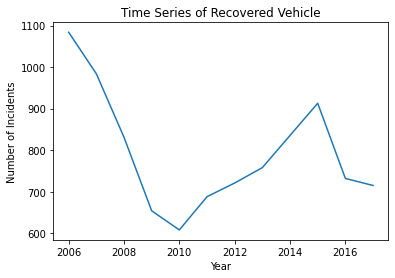

In [306]:
# plot a time series of the category 'RECOVERED VEHICLE' where x-axis is the year and y-axis is the number of incidents reported
rec_veh = data[data["Category"] == "RECOVERED VEHICLE"]   
rec_veh = rec_veh.groupby(["Year"]).size().reset_index(name="Count")
plt.plot(rec_veh["Year"], rec_veh["Count"])
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Time Series of Recovered Vehicle")
plt.show()



## Contributions
<span style="color:red">Lena mainly contributed with....
Freja mainly contributed with....</span>

Both of us now all parts of the assignment and have done the weekly exercises.